In [1]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid",context='talk', font_scale=1.1)
%matplotlib inline

import scipy as scp
import pandas as pd
import copy as cp
from tqdm import tqdm 
from itertools import cycle

In [2]:
%run metapop.py

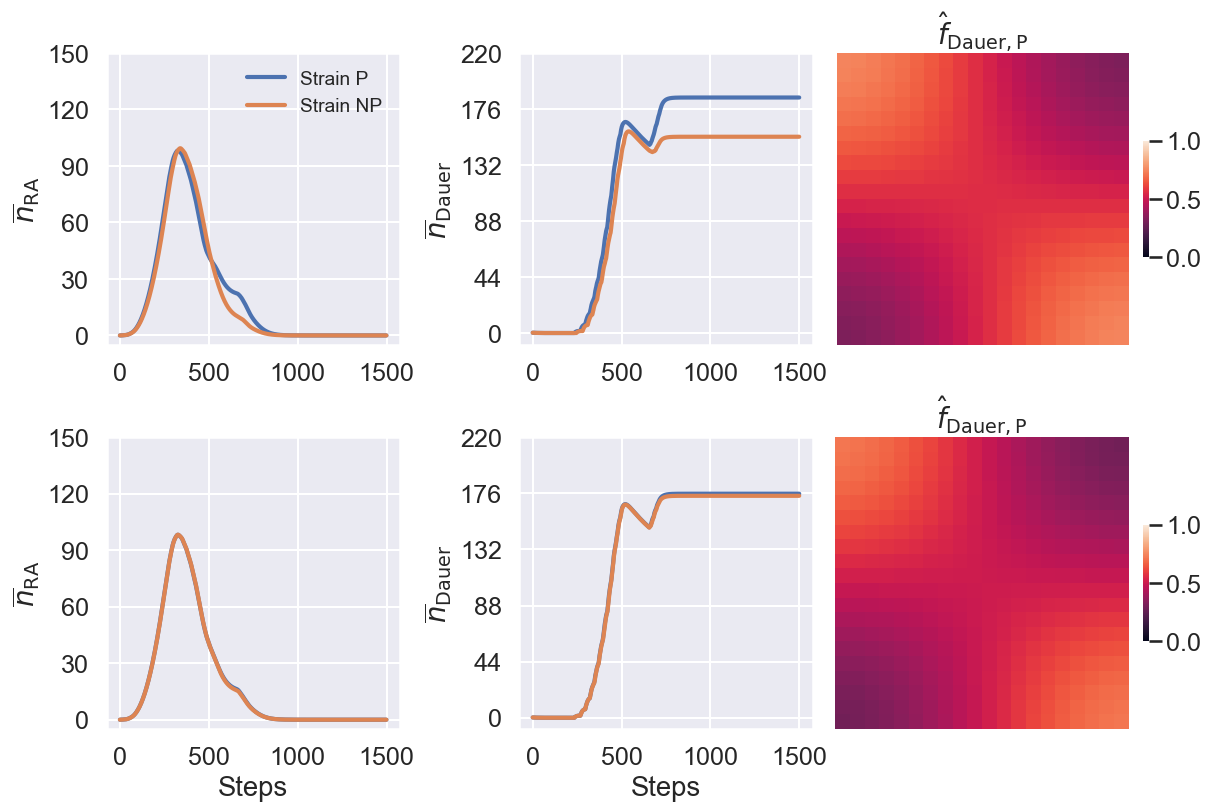

In [3]:
fig, axes = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(12, 8),
    constrained_layout=True)

axes = axes.flatten()

for i in [1, 4]:
    axes[i].set_ylabel(r'$\overline{n}_{\mathrm{Dauer}}}$')
for i in [0, 3]:
    axes[i].set_ylabel(r'$\overline{n}_{\mathrm{RA}}}$', fontsize=20)
    
for i in [2, 5]:
    axes[i].set_title(r'$\hat{f}_{\mathrm{Dauer}, \mathrm{P}}$')
    
fec_pars = {'A': {'OP50': [22.65, 68.45, 57.05, 33.4,  4.97], 'Novo': [11.66, 62.53, 47.13, 13.94,  0.72]},
            'C': {'OP50': [19.8 , 60.3 , 43.02, 19.9,  6.6], 'Novo': [16.88, 80.77, 77.7 , 16.28,  1.4]}}

mf_prob = {'A': {'OP50': 0.11, 'Novo': 0.83}, 'C': {'OP50': 1.0, 'Novo': 1.0}}
disp_rate = [0.01, 0.01]
dim = 20
metpop = MetaPopulation(dim, fec_pars, mf_prob, r_rate=disp_rate, pred_rate=0.)
metpop.fill_pop()
metpop.add_pop((0,0), 'A')
metpop.add_pop((dim-1,dim-1), 'A')
metpop.add_pop((0,dim-1), 'C')
metpop.add_pop((dim-1,0), 'C')
metpop.set_diet_comp('OP50')

dis_t = []
dis_a = []
time = 1500
for i in range(time):
    metpop.simulate_pops_one_step()
    a, b = metpop.daur_dist
    t1, t2 = metpop.ra_dist
    dis_t.append((a, b))
    dis_a.append((t1, t2))
    metpop.disperse_dauer()
    
axes[0].plot([np.mean(i[0]) for i in dis_a], lw=3, label="Strain P")
axes[0].plot([np.mean(i[1]) for i in dis_a], lw=3, label="Strain NP")

axes[0].legend(loc='best', frameon=False, fontsize='x-small')

axes[1].plot([np.mean(i[0]) for i in dis_t], lw=3, label="Strain P")
axes[1].plot([np.mean(i[1]) for i in dis_t], lw=3, label="Strain NP")


sns.heatmap(np.divide(dis_t[-1][0], dis_t[-1][0] + dis_t[-1][1]), ax=axes[2], vmin=0, vmax=1, cbar_kws={'ticks':[0, 0.5, 1], 'location':'right', 'shrink':0.4, 'pad':0.05}, square=True)
axes[2].set_yticks(np.linspace(0, dim, dim))
axes[2].set_xticks(np.linspace(0, dim, dim))
yticks = axes[2].get_yticks()
axes[2].set_yticklabels(['' for i in yticks])
xticks = axes[2].get_xticks()
axes[2].set_xticklabels(['' for i in xticks])

fec_pars = {'A': {'OP50': [22.65, 68.45, 57.05, 33.4,  4.97], 'Novo': [11.66, 62.53, 47.13, 13.94,  0.72]},
            'C': {'OP50': [16.88, 80.77, 77.7 , 16.28,  1.4], 'Novo': [16.88, 80.77, 77.7 , 16.28,  1.4]}}

mf_prob = {'A': {'OP50': 0.11, 'Novo': 0.83}, 'C': {'OP50': 1.0, 'Novo': 1.0}}
metpop = MetaPopulation(dim, fec_pars, mf_prob, r_rate=disp_rate, pred_rate=0.)
metpop.fill_pop()
metpop.add_pop((0,0), 'A')
metpop.add_pop((dim-1,dim-1), 'A')
metpop.add_pop((0,dim-1), 'C')
metpop.add_pop((dim-1,0), 'C')
metpop.set_diet_comp('OP50')
dis_t = []
dis_a = []
for i in range(time):
    metpop.simulate_pops_one_step()
    a, b = metpop.daur_dist
    t1, t2 = metpop.ra_dist
    dis_t.append((a, b))
    dis_a.append((t1, t2))
    metpop.disperse_dauer()
    
axes[3].plot([np.mean(i[0]) for i in dis_a], lw=3, label="Strain P")
axes[3].plot([np.mean(i[1]) for i in dis_a], lw=3, label="Strain NP")
axes[4].plot([np.mean(i[0]) for i in dis_t], lw=3, label="Strain P")
axes[4].plot([np.mean(i[1]) for i in dis_t], lw=3, label="Strain NP")



sns.heatmap(np.divide(dis_t[-1][0], dis_t[-1][0] + dis_t[-1][1]), ax=axes[5], vmin=0, vmax=1, cbar_kws={'ticks':[0, 0.5, 1], 'location':'right', 'shrink':0.4, 'pad':0.05})
axes[5].set_yticks(np.linspace(0, dim, dim))
axes[5].set_xticks(np.linspace(0, dim, dim))
yticks = axes[5].get_yticks()
axes[5].set_yticklabels(['' for i in yticks])
xticks = axes[5].get_xticks()
axes[5].set_xticklabels(['' for i in xticks]) 

for i in [0, 1, 3, 4]:
    axes[i].set_xticks(np.linspace(0, time, 4))
    
for i in [3, 4]:
    axes[i].set_xlabel('Steps')
    
for i in [0, 3]:
    axes[i].set_yticks(np.linspace(0, 150, 6))
    
for i in [1, 4]:
    axes[i].set_yticks(np.linspace(0, 220, 6))

plt.savefig('./figures/rev_figures/OP50_cost_v_no_cost_no_pred.pdf', bbox_inches='tight', dpi=300);

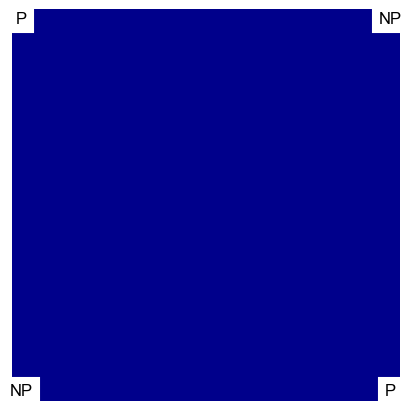

In [6]:
resource_dist = np.zeros((dim, dim))

for i in metpop.index:
    if metpop.metapop[i].diet == 'Novo':
        resource_dist[i[0]][i[1]] = 1
fig, ax = plt.subplots(
nrows=1,
ncols=1,
figsize=(4, 4),
constrained_layout=True)

sns.heatmap(resource_dist, ax = ax, cbar=False, cmap=['darkblue', 'gold'])

for label,i,j in metpop.init_pos: 
    ax.text(j + 0.5, i + 0.5, label, ha='center', va='center', fontsize=12, color='black',backgroundcolor='white')
    
ax.set(yticks=[], xticks=[])

plt.savefig('./figures/rev_figures/OP50_config.pdf', bbox_inches='tight', dpi=300);

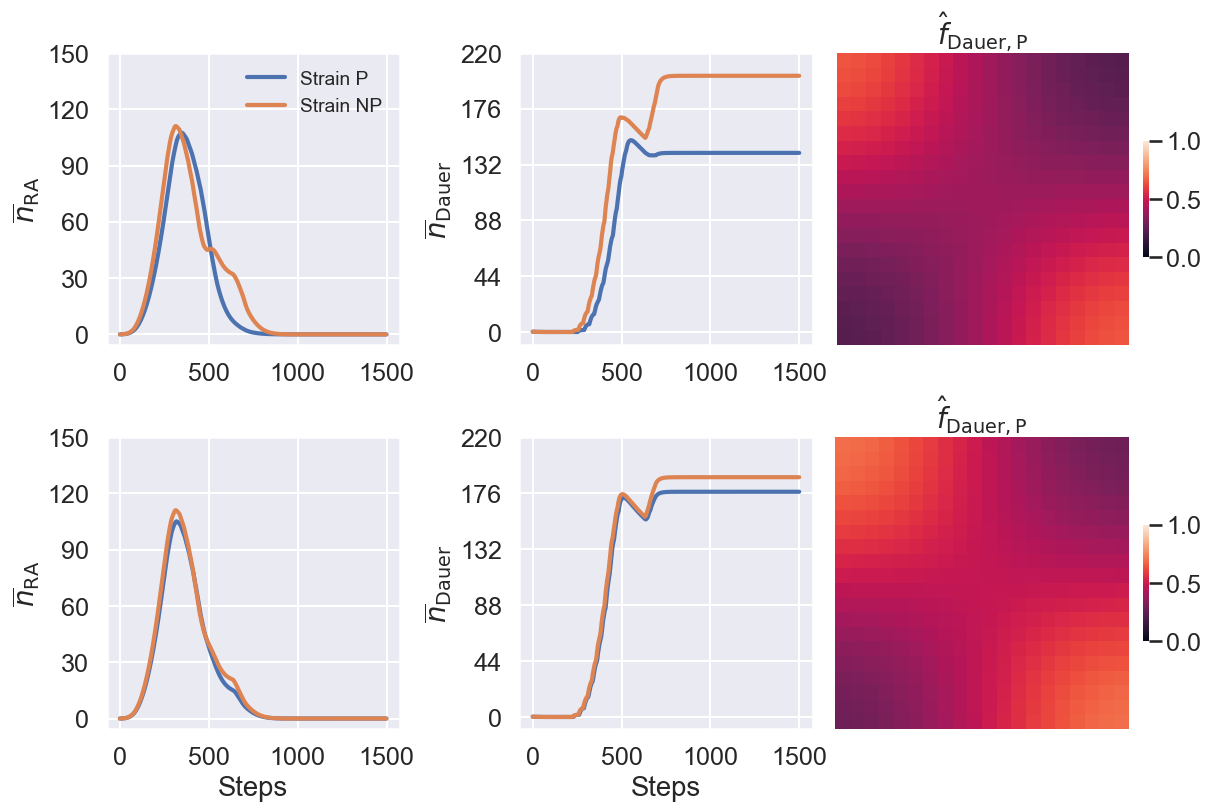

In [4]:
fig, axes = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(12, 8),
    constrained_layout=True)

axes = axes.flatten()

for i in [1, 4]:
    axes[i].set_ylabel(r'$\overline{n}_{\mathrm{Dauer}}}$')
for i in [0, 3]:
    axes[i].set_ylabel(r'$\overline{n}_{\mathrm{RA}}}$', fontsize=20)
    
for i in [2, 5]:
    axes[i].set_title(r'$\hat{f}_{\mathrm{Dauer}, \mathrm{P}}$')
    
fec_pars = {'A': {'OP50': [22.65, 68.45, 57.05, 33.4,  4.97], 'Novo': [11.66, 62.53, 47.13, 13.94,  0.72]},
            'C': {'OP50': [19.8 , 60.3 , 43.02, 19.9,  6.6], 'Novo': [16.88, 80.77, 77.7 , 16.28,  1.4]}}

mf_prob = {'A': {'OP50': 0.11, 'Novo': 0.83}, 'C': {'OP50': 1.0, 'Novo': 1.0}}
disp_rate = [0.01, 0.01]
dim = 20
metpop = MetaPopulation(dim, fec_pars, mf_prob, r_rate=disp_rate, pred_rate=0.)
metpop.fill_pop()
metpop.add_pop((0,0), 'A')
metpop.add_pop((dim-1,dim-1), 'A')
metpop.add_pop((0,dim-1), 'C')
metpop.add_pop((dim-1,0), 'C')
metpop.set_diet_comp('Novo')

dis_t = []
dis_a = []
time = 1500
for i in range(time):
    metpop.simulate_pops_one_step()
    a, b = metpop.daur_dist
    t1, t2 = metpop.ra_dist
    dis_t.append((a, b))
    dis_a.append((t1, t2))
    metpop.disperse_dauer()
    
axes[0].plot([np.mean(i[0]) for i in dis_a], lw=3, label="Strain P")
axes[0].plot([np.mean(i[1]) for i in dis_a], lw=3, label="Strain NP")

axes[0].legend(loc='best', frameon=False, fontsize='x-small')

axes[1].plot([np.mean(i[0]) for i in dis_t], lw=3, label="Strain P")
axes[1].plot([np.mean(i[1]) for i in dis_t], lw=3, label="Strain NP")


sns.heatmap(np.divide(dis_t[-1][0], dis_t[-1][0] + dis_t[-1][1]), ax=axes[2], vmin=0, vmax=1, cbar_kws={'ticks':[0, 0.5, 1], 'location':'right', 'shrink':0.4, 'pad':0.05}, square=True)
axes[2].set_yticks(np.linspace(0, dim, dim))
axes[2].set_xticks(np.linspace(0, dim, dim))
yticks = axes[2].get_yticks()
axes[2].set_yticklabels(['' for i in yticks])
xticks = axes[2].get_xticks()
axes[2].set_xticklabels(['' for i in xticks])

fec_pars = {'A': {'OP50': [22.65, 68.45, 57.05, 33.4,  4.97], 'Novo': [22.65, 68.45, 57.05, 33.4,  4.97]},
            'C': {'OP50': [16.88, 80.77, 77.7 , 16.28,  1.4], 'Novo': [16.88, 80.77, 77.7 , 16.28,  1.4]}}

mf_prob = {'A': {'OP50': 0.11, 'Novo': 0.83}, 'C': {'OP50': 1.0, 'Novo': 1.0}}
metpop = MetaPopulation(dim, fec_pars, mf_prob, r_rate=disp_rate, pred_rate=0.)
metpop.fill_pop()
metpop.add_pop((0,0), 'A')
metpop.add_pop((dim-1,dim-1), 'A')
metpop.add_pop((0,dim-1), 'C')
metpop.add_pop((dim-1,0), 'C')
metpop.set_diet_comp('Novo')
dis_t = []
dis_a = []
for i in range(time):
    metpop.simulate_pops_one_step()
    a, b = metpop.daur_dist
    t1, t2 = metpop.ra_dist
    dis_t.append((a, b))
    dis_a.append((t1, t2))
    metpop.disperse_dauer()
    
axes[3].plot([np.mean(i[0]) for i in dis_a], lw=3, label="Strain P")
axes[3].plot([np.mean(i[1]) for i in dis_a], lw=3, label="Strain NP")
axes[4].plot([np.mean(i[0]) for i in dis_t], lw=3, label="Strain P")
axes[4].plot([np.mean(i[1]) for i in dis_t], lw=3, label="Strain NP")



sns.heatmap(np.divide(dis_t[-1][0], dis_t[-1][0] + dis_t[-1][1]), ax=axes[5], vmin=0, vmax=1, cbar_kws={'ticks':[0, 0.5, 1], 'location':'right', 'shrink':0.4, 'pad':0.05})
axes[5].set_yticks(np.linspace(0, dim, dim))
axes[5].set_xticks(np.linspace(0, dim, dim))
yticks = axes[5].get_yticks()
axes[5].set_yticklabels(['' for i in yticks])
xticks = axes[5].get_xticks()
axes[5].set_xticklabels(['' for i in xticks]) 

for i in [0, 1, 3, 4]:
    axes[i].set_xticks(np.linspace(0, time, 4))
    
for i in [3, 4]:
    axes[i].set_xlabel('Steps')
    
for i in [0, 3]:
    axes[i].set_yticks(np.linspace(0, 150, 6))
    
for i in [1, 4]:
    axes[i].set_yticks(np.linspace(0, 220, 6))

plt.savefig('./figures/rev_figures/Novo_cost_v_no_cost_no_pred.pdf', bbox_inches='tight', dpi=300);

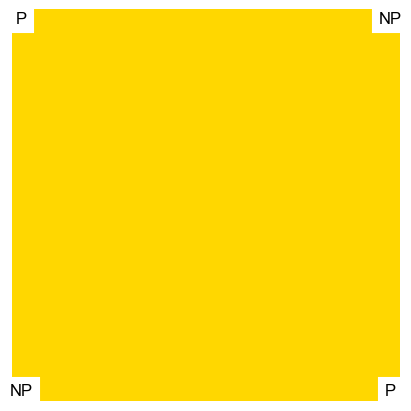

In [10]:
resource_dist = np.zeros((dim, dim))

for i in metpop.index:
    if metpop.metapop[i].diet == 'Novo':
        resource_dist[i[0]][i[1]] = 1
fig, ax = plt.subplots(
nrows=1,
ncols=1,
figsize=(4, 4),
constrained_layout=True)

sns.heatmap(resource_dist, ax = ax, cbar=False, cmap=['gold'])

for label,i,j in metpop.init_pos: 
    ax.text(j + 0.5, i + 0.5, label, ha='center', va='center', fontsize=12, color='black',backgroundcolor='white')
    
ax.set(yticks=[], xticks=[])

plt.savefig('./figures/rev_figures/Novo_config.pdf', bbox_inches='tight', dpi=300);

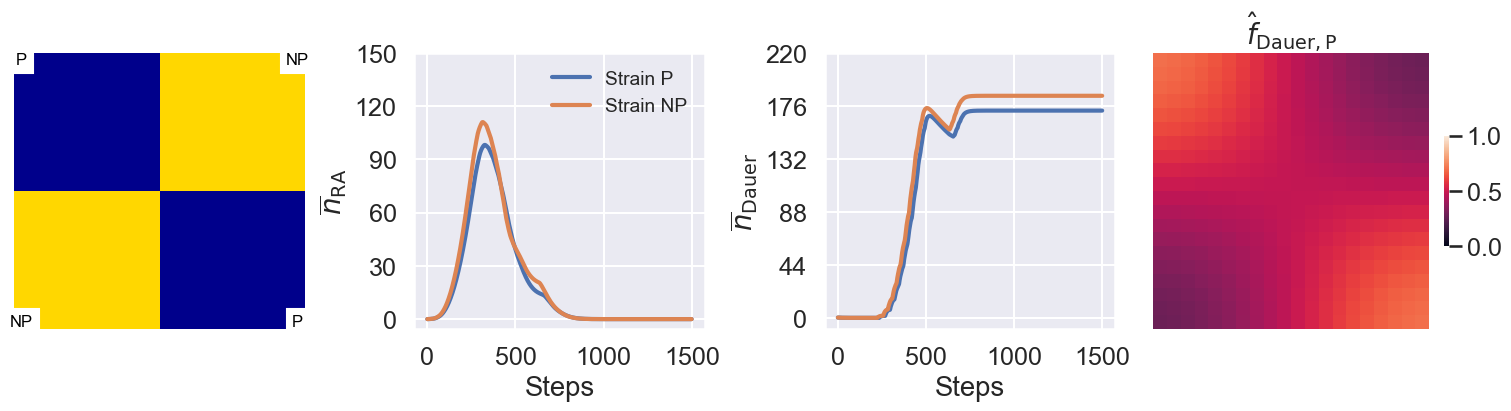

In [5]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=4,
    figsize=(15, 4),
    constrained_layout=True)

axes = axes.flatten()
    
axes[1].set_ylabel(r'$\overline{n}_{\mathrm{RA}}}$', fontsize=20)
axes[2].set_ylabel(r'$\overline{n}_{\mathrm{Dauer}}}$')
axes[3].set_title(r'$\hat{f}_{\mathrm{Dauer}, \mathrm{P}}$')

fec_pars = {'A': {'OP50': [22.65, 68.45, 57.05, 33.4,  4.97], 'Novo': [11.66, 62.53, 47.13, 13.94,  0.72]},
            'C': {'OP50': [19.8 , 60.3 , 43.02, 19.9,  6.6], 'Novo': [16.88, 80.77, 77.7 , 16.28,  1.4]}}

mf_prob = {'A': {'OP50': 0.11, 'Novo': 0.83}, 'C': {'OP50': 1.0, 'Novo': 1.0}}
disp_rate = [0.01, 0.01]
dim = 20
metpop = MetaPopulation(dim, fec_pars, mf_prob, r_rate=disp_rate, pred_rate=0.)
metpop.fill_pop()
#metpop.add_pop_rand(['A','A','C','C'])
metpop.add_pop((0,0), 'A')
metpop.add_pop((dim-1,dim-1), 'A')
metpop.add_pop((0,dim-1), 'C')
metpop.add_pop((dim-1,0), 'C')
metpop.set_diet_comp('quad_1')

dis_t = []
dis_a = []
#time = 1500
time = 1500
for i in range(time):
    metpop.simulate_pops_one_step()
    a, b = metpop.daur_dist
    t1, t2 = metpop.ra_dist
    dis_t.append((a, b))
    dis_a.append((t1, t2))
    metpop.disperse_dauer()
    
axes[1].plot([np.mean(i[0]) for i in dis_a], lw=3, label="Strain P")
axes[1].plot([np.mean(i[1]) for i in dis_a], lw=3, label="Strain NP")

axes[1].legend(loc='best', frameon=False, fontsize='x-small')

axes[2].plot([np.mean(i[0]) for i in dis_t], lw=3, label="Strain P")
axes[2].plot([np.mean(i[1]) for i in dis_t], lw=3, label="Strain NP")


sns.heatmap(np.divide(dis_t[-1][0], dis_t[-1][0] + dis_t[-1][1]), ax=axes[3], vmin=0, vmax=1, cbar_kws={'ticks':[0, 0.5, 1], 'location':'right', 'shrink':0.4, 'pad':0.05}, square=True)
axes[3].set_yticks(np.linspace(0, dim, dim))
axes[3].set_xticks(np.linspace(0, dim, dim))
yticks = axes[3].get_yticks()
axes[3].set_yticklabels(['' for i in yticks])
xticks = axes[3].get_xticks()
axes[3].set_xticklabels(['' for i in xticks])


    
for i in [1, 2]:
    axes[i].set_xlabel('Steps')
    axes[i].set_xticks(np.linspace(0, time, 4))
    
axes[1].set_yticks(np.linspace(0, 150, 6))
    
axes[2].set_yticks(np.linspace(0, 220, 6))

resource_dist = np.zeros((dim, dim))
for i in metpop.index:
    if metpop.metapop[i].diet == 'Novo':
        resource_dist[i[0]][i[1]] = 1

sns.heatmap(resource_dist, ax = axes[0], cbar=False, cmap=['darkblue', 'gold'])

for label,i,j in metpop.init_pos: 
    axes[0].text(j + 0.5, i + 0.5, label, ha='center', va='center', fontsize=12, color='black',backgroundcolor='white')
    
axes[0].set(yticks=[], xticks=[])


plt.savefig('./figures/rev_figures/meta_quad_1_no_pred.pdf', bbox_inches='tight', dpi=300)

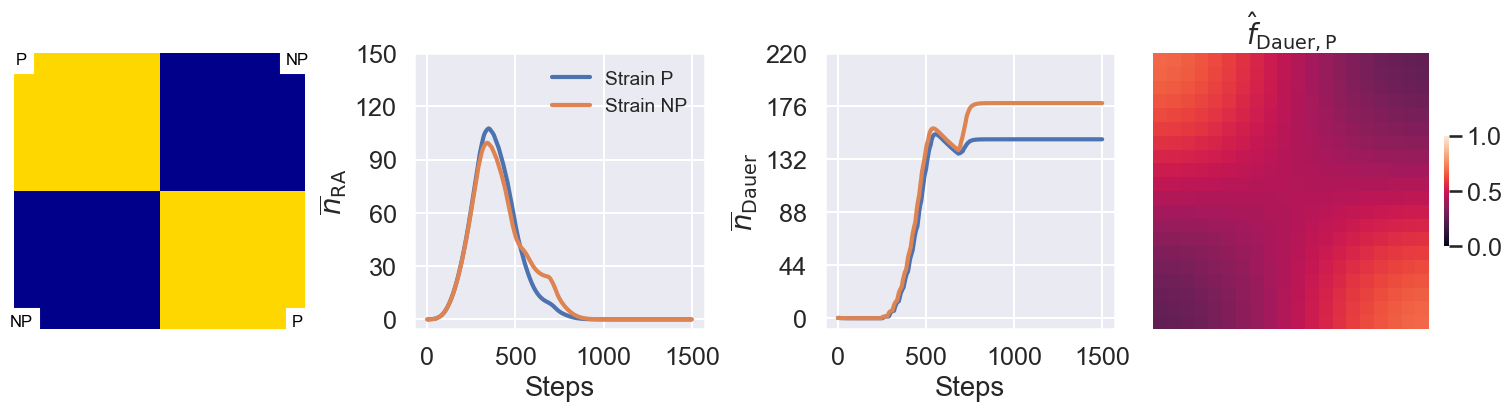

In [ ]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=4,
    figsize=(15, 4),
    constrained_layout=True)

axes = axes.flatten()
    
axes[1].set_ylabel(r'$\overline{n}_{\mathrm{RA}}}$', fontsize=20)
axes[2].set_ylabel(r'$\overline{n}_{\mathrm{Dauer}}}$')
axes[3].set_title(r'$\hat{f}_{\mathrm{Dauer}, \mathrm{P}}$')

fec_pars = {'A': {'OP50': [22.65, 68.45, 57.05, 33.4,  4.97], 'Novo': [11.66, 62.53, 47.13, 13.94,  0.72]},
            'C': {'OP50': [19.8 , 60.3 , 43.02, 19.9,  6.6], 'Novo': [16.88, 80.77, 77.7 , 16.28,  1.4]}}

mf_prob = {'A': {'OP50': 0.11, 'Novo': 0.83}, 'C': {'OP50': 1.0, 'Novo': 1.0}}
disp_rate = [0.01, 0.01]
dim = 20
metpop = MetaPopulation(dim, fec_pars, mf_prob, r_rate=disp_rate, pred_rate=0.)
metpop.fill_pop()
#metpop.add_pop_rand(['A','A','C','C'])
metpop.add_pop((0,0), 'A')
metpop.add_pop((dim-1,dim-1), 'A')
metpop.add_pop((0,dim-1), 'C')
metpop.add_pop((dim-1,0), 'C')
metpop.set_diet_comp('quad_2')

dis_t = []
dis_a = []
#time = 1500
time = 1500
for i in range(time):
    metpop.simulate_pops_one_step()
    a, b = metpop.daur_dist
    t1, t2 = metpop.ra_dist
    dis_t.append((a, b))
    dis_a.append((t1, t2))
    metpop.disperse_dauer()
    
axes[1].plot([np.mean(i[0]) for i in dis_a], lw=3, label="Strain P")
axes[1].plot([np.mean(i[1]) for i in dis_a], lw=3, label="Strain NP")

axes[1].legend(loc='best', frameon=False, fontsize='x-small')

axes[2].plot([np.mean(i[0]) for i in dis_t], lw=3, label="Strain P")
axes[2].plot([np.mean(i[1]) for i in dis_t], lw=3, label="Strain NP")


sns.heatmap(np.divide(dis_t[-1][0], dis_t[-1][0] + dis_t[-1][1]), ax=axes[3], vmin=0, vmax=1, cbar_kws={'ticks':[0, 0.5, 1], 'location':'right', 'shrink':0.4, 'pad':0.05}, square=True)
axes[3].set_yticks(np.linspace(0, dim, dim))
axes[3].set_xticks(np.linspace(0, dim, dim))
yticks = axes[3].get_yticks()
axes[3].set_yticklabels(['' for i in yticks])
xticks = axes[3].get_xticks()
axes[3].set_xticklabels(['' for i in xticks])


    
for i in [1, 2]:
    axes[i].set_xlabel('Steps')
    axes[i].set_xticks(np.linspace(0, time, 4))
    
axes[1].set_yticks(np.linspace(0, 150, 6))
    
axes[2].set_yticks(np.linspace(0, 220, 6))

resource_dist = np.zeros((dim, dim))
for i in metpop.index:
    if metpop.metapop[i].diet == 'Novo':
        resource_dist[i[0]][i[1]] = 1

sns.heatmap(resource_dist, ax = axes[0], cbar=False, cmap=['darkblue', 'gold'])

for label,i,j in metpop.init_pos: 
    axes[0].text(j + 0.5, i + 0.5, label, ha='center', va='center', fontsize=12, color='black',backgroundcolor='white')
    
axes[0].set(yticks=[], xticks=[])


plt.savefig('./figures/rev_figures/meta_quad_2_no_pred.pdf', bbox_inches='tight', dpi=300)